In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [68]:
loan_eligible_train_df = pd.read_csv("/kaggle/input/loan-eligible-dataset/loan-train.csv")
loan_eligible_test_df = pd.read_csv("/kaggle/input/loan-eligible-dataset/loan-test.csv")

In [78]:
loan_eligible_train_df.isna().sum()
# Daha sonra silinecek

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

/tmp/ipykernel_32/2007269581.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  no_null_corr = df_no_null.corr()["Loan_Status"].sort_values(ascending = False)


<Axes: >

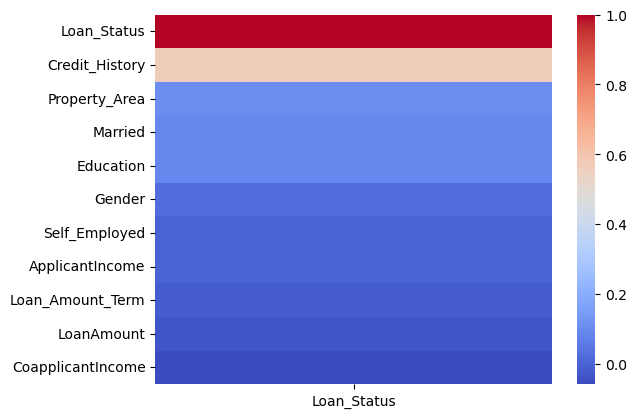

In [91]:
df_no_null = loan_eligible_train_df[loan_eligible_train_df.notnull()]
no_null_corr = df_no_null.corr()["Loan_Status"].sort_values(ascending = False)
sns.heatmap(no_null_corr.to_frame(),cmap = "coolwarm" )
# As we can see from the heaptmap Credit_History column is highly related with loan_status column so it's preferable to drop null values in other columns

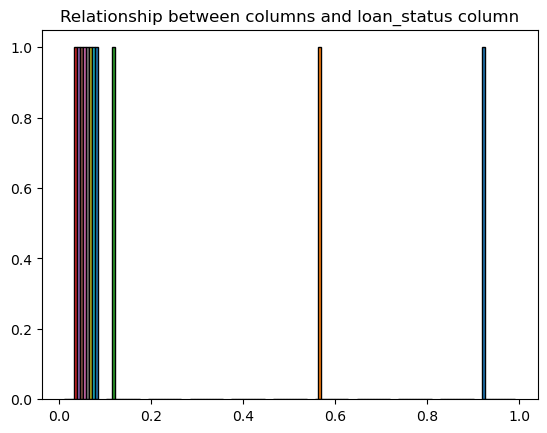

In [99]:
plt.hist(abs(no_null_corr.to_frame().T), bins = 11, edgecolor = "black")
plt.xlabel('')
plt.ylabel('')
plt.title('Relationship between columns and loan_status column')
# Here is another example that shows the relationship between loan_status and other columns
plt.show()

In [148]:
columns_to_drop = list(loan_eligible_train_df.columns)
columns_to_drop.remove("Credit_History")
columns_to_drop.remove("Loan_Status")
loan_eligible_train_df.dropna(subset = ["Loan_Amount_Term"],inplace = True)

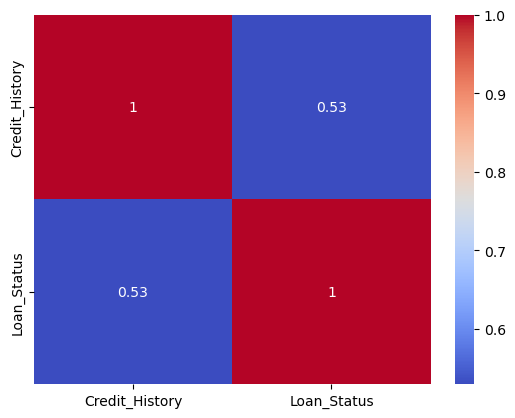

In [151]:
a =loan_eligible_train_df[loan_eligible_train_df.notnull()]["Credit_History"]
b = loan_eligible_train_df[loan_eligible_train_df.notnull()]["Loan_Status"]
c = pd.concat([a,b],axis = 1)
c_corr = c.corr()
sns.heatmap(c_corr,annot = True, cmap = "coolwarm")
plt.show()
# We can see that there is a major relationship between those two columns so, we shouldn't drop the null values in Credit_History column.

/tmp/ipykernel_32/367183410.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_history_col_corr = loan_eligible_train_df[loan_eligible_train_df.notnull()].corr()["Credit_History"].sort_values(ascending = False)


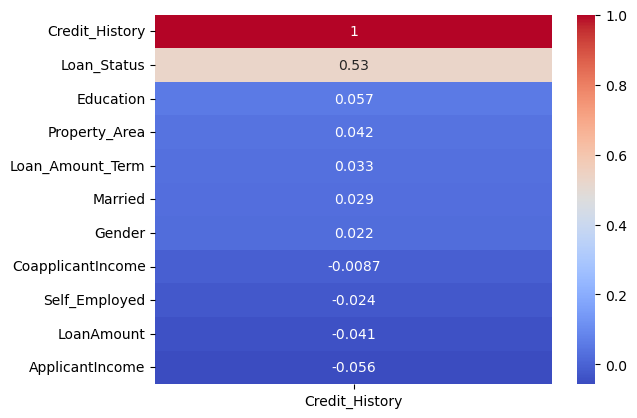

In [157]:
credit_history_col_corr = loan_eligible_train_df[loan_eligible_train_df.notnull()].corr()["Credit_History"].sort_values(ascending = False)
sns.heatmap(credit_history_col_corr.to_frame(), annot  =True,cmap="coolwarm")
plt.show()
# We are going to predict the credit history value to fill null values using loan_status column since other columns don't have a major relationship with credit history.

In [172]:
X = loan_eligible_train_df[loan_eligible_train_df["Credit_History"].notnull()]["Loan_Status"]
Y = loan_eligible_train_df[loan_eligible_train_df["Credit_History"].notnull()]["Credit_History"]
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)

384
96
384
96
(384,)
(96,)
(384,)
(96,)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8854166666666666

In [192]:
x_new = loan_eligible_train_df[loan_eligible_train_df["Credit_History"].isnull()]["Loan_Status"]
y_new_val = model.predict(np.array(x_new).reshape(-1,1))
y_new_val_series = pd.Series(y_new_val, index=x_new.index)
loan_eligible_train_df["Credit_History"].fillna(y_new_val_series, inplace = True)

In [193]:
loan_eligible_train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [195]:
columns_to_scale = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
scaler = StandardScaler()
loan_eligible_train_df[columns_to_scale] = scaler.fit_transform(loan_eligible_train_df[columns_to_scale])
loan_eligible_train_df
# Geriye scaling kaldı onun harici ml modeline hazır verimiz.
# LoanAmount, Loan_Amount_Term , ApplicantIncome ve CoapplicantIncome için scaling yapılırsa tamam bence

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1,1,0.0,-0.132228,-0.037489,-0.210306,0.274064,1.0,2,0
2,1.0,1.0,0,1,1.0,-0.417751,-0.623328,-0.955999,0.274064,1.0,1,1
3,1.0,1.0,0,0,0.0,-0.492965,0.292726,-0.306524,0.274064,1.0,1,1
4,1.0,0.0,0,1,0.0,0.123355,-0.623328,-0.053950,0.274064,1.0,1,1
5,1.0,1.0,2,1,1.0,0.018200,1.006766,1.461491,0.274064,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,-0.435788,-0.623328,-0.895862,0.274064,1.0,2,1
610,1.0,1.0,3,1,0.0,-0.218264,-0.623328,-1.268709,-2.464832,1.0,2,1
611,1.0,1.0,1,1,0.0,0.497078,-0.530091,1.293109,0.274064,1.0,1,1
612,1.0,1.0,2,1,0.0,0.408878,-0.623328,0.499306,0.274064,1.0,1,1


In [73]:
loan_eligible_train_df["Property_Area"].value_counts() # To see if how many values does property area column have.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [61]:
loan_eligible_train_df["Dependents"].value_counts() 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [74]:
loan_eligible_train_df["Married"] = loan_eligible_train_df["Married"].replace({"Yes":1, "No":0})
loan_eligible_train_df["Gender"] = loan_eligible_train_df["Gender"].replace({"Male":1, "Female":0})
loan_eligible_train_df["Education"] = loan_eligible_train_df["Education"].replace({"Graduate":1, "Not Graduate":0})
loan_eligible_train_df["Self_Employed"] = loan_eligible_train_df["Self_Employed"].replace({"Yes":1, "No":0})
loan_eligible_train_df['Property_Area'] = pd.factorize(loan_eligible_train_df['Property_Area'])[0] + 1
loan_eligible_train_df["Loan_Status"] = loan_eligible_train_df["Loan_Status"].replace({"Y":1,"N":0})
loan_eligible_train_df["Dependents"] = loan_eligible_train_df["Dependents"].replace({"3+":3})
# Dependents colunm remained as object but I shouldn't remove the null values so I will wait

In [75]:
loan_eligible_train_df[loan_eligible_train_df["Dependents"].isnull()]["Loan_Status"] 
# I have checked the loan status value whose dependents value is null such that I didn't remove the values whose loan status value is zero
#loan_eligible_train_df.dropna(subset = ["Dependents"],inplace = True)
#loan_eligible_train_df["Dependents"] = loan_eligible_train_df["Dependents"].astype(int)

102    1
104    1
120    1
226    0
228    1
293    0
301    1
332    1
335    1
346    0
355    1
435    1
517    0
571    0
597    0
Name: Loan_Status, dtype: int64

In [52]:
loan_eligible_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             586 non-null    float64
 1   Married            599 non-null    float64
 2   Dependents         599 non-null    int64  
 3   Education          599 non-null    int64  
 4   Self_Employed      567 non-null    float64
 5   ApplicantIncome    599 non-null    int64  
 6   CoapplicantIncome  599 non-null    float64
 7   LoanAmount         579 non-null    float64
 8   Loan_Amount_Term   586 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      599 non-null    int64  
 11  Loan_Status        599 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 60.8 KB


In [ ]:
a = list(loan_eligible_train_df.columns)
a.remove("Loan_Status")
a

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(loan_eligible_train_df[a]),columns = a)
loan_eligible_train_df = pd.concat([df_scaled,loan_eligible_train_df["Loan_Status"]],axis = 1)
loan_eligible_train_df.head()

In [41]:
loan_eligible_train_df["Loan_Status"].value_counts()

1    554
Name: Loan_Status, dtype: int64

In [ ]:
correlation_matrix = loan_eligible_train_df.corr()
correlation_matrix

In [ ]:
sns.heatmap(correlation_matrix,annot = True,cmap="coolwarm")
plt.title("Correlation Matrix of Loan Eligibility")
plt.show()

In [202]:
X = loan_eligible_train_df.drop("Loan_Status",axis=1)
Y = loan_eligible_train_df["Loan_Status"]
print(X.shape)
print(Y.shape)

(523, 11)
(523,)


In [204]:
len(loan_eligible_train_df["Loan_Status"])

523

In [205]:
X = loan_eligible_train_df.drop("Loan_Status",axis=1)
Y = loan_eligible_train_df["Loan_Status"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
f1 = f1_score(y_test,y_pred)
f1

(418, 11)
(105, 11)
(418,)
(105,)


0.8625